**tensorflow.keras:** TensorFlow is an open-source machine learning framework, and Keras is a high-level neural networks API that runs on top of TensorFlow. Here, we import specific modules from Keras to build our neural network model.

**matplotlib.pyplot:** This library is used for creating static, interactive, and animated visualizations in Python. We import it as `plt`, a common alias.

**plotly.graph_objects:** Plotly is an interactive visualization library. Here, we import the `graph_objects` module to create interactive plots.

**plotly.io:** This module provides functions to write, read, and display interactive plots.

**pandas:** Pandas is a powerful data manipulation library. It offers data structures and operations for manipulating numerical tables and time series data.

**sklearn.preprocessing.MinMaxScaler:** This class is used for scaling numerical input data to a specified range. It's often used to normalize data before feeding it into a machine learning model.

**numpy:** NumPy is a fundamental package for scientific computing with Python. It provides support for arrays, matrices, and mathematical functions.

**sklearn.model_selection.TimeSeriesSplit:** This module provides a time series cross-validator that allows us to split time series data for cross-validation. It's useful for evaluating time-series forecasting models.


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

**df = pd.read_csv("AMZN.csv",na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True):**
- This line reads a CSV file named "AMZN.csv" into a DataFrame using pandas (`pd.read_csv()`).
- `na_values=['null']` specifies that any occurrences of 'null' in the CSV file should be treated as missing values.
- `index_col='Date'` sets the 'Date' column as the index of the DataFrame.
- `parse_dates=True` instructs pandas to parse dates while reading the CSV file.
- `infer_datetime_format=True` enables pandas to automatically infer the datetime format of the dates in the DataFrame.

**global_scaler = MinMaxScaler():**
- This line initializes a MinMaxScaler object named `global_scaler` from scikit-learn (`MinMaxScaler()`).


In [27]:
df = pd.read_csv("C:\\Users\\Tejas\\Downloads\\AMZN.csv",na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)
global_scaler = MinMaxScaler()

C:\Users\Tejas\AppData\Local\Temp\ipykernel_12000\3035235124.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("C:\\Users\\Tejas\\Downloads\\AMZN.csv",na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)



**output_var = pd.DataFrame(df['Close']):**
- This line creates a DataFrame named `output_var` containing only the 'Close' column from the DataFrame `df`.

**features = ['Open', 'High', 'Low', 'Volume']:**
- This line defines a list named `features` containing the column names 'Open', 'High', 'Low', and 'Volume'.

**scaler = MinMaxScaler(feature_range=(0, 1)):**
- This line initializes a MinMaxScaler object named `scaler` from scikit-learn (`MinMaxScaler()`).
- `feature_range=(0, 1)` specifies the range to which the features will be scaled.

**feature_transform = scaler.fit_transform(df[features]):**
- This line scales the features specified in the `features` list using the MinMaxScaler object `scaler`.
- `fit_transform()` computes the minimum and maximum values of the features and scales the data accordingly.

**feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index):**
- This line creates a DataFrame named `feature_transform` containing the scaled features.
- `columns=features` specifies the column names of the DataFrame.
- `data=feature_transform` assigns the scaled feature data to the DataFrame.
- `index=df.index` sets the index of the DataFrame to match that of the original DataFrame `df`.

**timesplit = TimeSeriesSplit(n_splits=10):**
- This line initializes a TimeSeriesSplit object named `timesplit` from scikit-learn (`TimeSeriesSplit()`).
- `n_splits=10` specifies the number of splits to create for time series cross-validation.
```


In [28]:
output_var = pd.DataFrame(df['Close'])
features = ['Open', 'High', 'Low', 'Volume']
scaler = MinMaxScaler(feature_range=(0, 1))
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)
timesplit = TimeSeriesSplit(n_splits=10)

**for train_index, test_index in timesplit.split(feature_transform):**
- This line iterates through the train and test indices generated by the `timesplit` TimeSeriesSplit object.

**X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index) + len(test_index))]:**
- This line extracts the features for training and testing datasets.
- `feature_transform[:len(train_index)]` selects the rows corresponding to the training indices.
- `feature_transform[len(train_index): (len(train_index) + len(test_index))]` selects the rows corresponding to the testing indices.

**y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index) + len(test_index))].values.ravel():**
- This line extracts the output variable (target) for training and testing datasets.
- `output_var[:len(train_index)].values.ravel()` selects the values of the output variable corresponding to the training indices and flattens them.
- `output_var[len(train_index): (len(train_index) + len(test_index))].values.ravel()` selects the values of the output variable corresponding to the testing indices and flattens them.


In [29]:
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index) + len(test_index))]
    y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index) + len(test_index))].values.ravel()


**trainX = np.array(X_train):**
- This line converts the training features (`X_train`) into a NumPy array and assigns it to the variable `trainX`.

**testX = np.array(X_test):**
- This line converts the testing features (`X_test`) into a NumPy array and assigns it to the variable `testX`.

**X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1]):**
- This line reshapes the training features array (`trainX`) into a 3D array suitable for feeding into an LSTM model.
- The `reshape()` function changes the shape of the array to `(number of samples, time steps, number of features)`.
- Here, the number of samples is obtained from `X_train.shape[0]`, the number of time steps is set to `1` since it's a time series, and the number of features is obtained from `X_train.shape[1]`.

**X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1]):**
- This line reshapes the testing features array (`testX`) into a 3D array similar to the training data.
- It follows the same logic as the reshaping of the training features.


In [30]:
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])


**def train_lstm_model(X_train, X_test, y_train, y_test, df, train_index, test_index):**
- This function trains an LSTM (Long Short-Term Memory) model for stock market prediction.

**global global_scaler:**
- This line accesses the global variable `global_scaler`, which is previously defined for scaling features.

**features = ['Open', 'High', 'Low', 'Volume']:**
- This line defines a list named `features` containing the column names 'Open', 'High', 'Low', and 'Volume', which are used for feature scaling.

**global_scaler.fit(df[features].values):**
- This line fits the global scaler (`global_scaler`) to the features in the DataFrame `df`.

**model = Sequential():**
- This line initializes a sequential model (`model`) using Keras' Sequential API.

**model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]))):**
- This line adds an LSTM layer to the model with 50 memory units.
- The `input_shape` parameter defines the shape of the input data. It specifies the number of time steps (`X_train.shape[1]`) and the number of features (`X_train.shape[2]`).

**model.add(Dense(32, activation='relu')):**
- This line adds a dense (fully connected) layer to the model with 32 units and ReLU activation function.

**model.add(Dense(1)):**
- This line adds the output layer to the model with a single unit.

**model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error'):**
- This line compiles the model, configuring the optimizer (Adam optimizer with a learning rate of 0.001) and the loss function (mean squared error).

**model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1):**
- This line trains the model on the training data (`X_train`, `y_train`) for 10 epochs with a batch size of 16.
- It also validates the model's performance on the testing data (`X_test`, `y_test`).

**predictions = model.predict(X_test):**
- This line generates predictions for the testing data (`X_test`) using the trained model.

**plt.subplots(figsize=(10, 5)):** 
- This line initializes a Matplotlib figure and axis objects with a specified figure size.

**ax.plot(df.index[len(train_index): (len(train_index)+len(test_index))], y_test, label='Actual', linestyle='-'):**
- This line plots the actual values of the output variable (`y_test`) against the corresponding dates from the testing set.
- The `len(train_index)` and `len(test_index)` are used to slice the DataFrame index to match the testing data.

**ax.plot(df.index[len(train_index): (len(train_index)+len(test_index))], predictions, label='Predicted', linestyle='-'):**
- This line plots the predicted values against the corresponding dates from the testing set.

**ax.set_title('Stock Market Prediction - LSTM'):**
- This line sets the title of the plot.

**ax.set_xlabel('Date'):**
- This line sets the label for the x-axis of the plot.

**ax.set_ylabel('Close Price'):**
- This line sets the label for the y-axis of the plot.

**ax.legend():**
- This line adds a legend to the plot.

**return model:**
- This line returns the trained LSTM model.


In [31]:
def train_lstm_model(X_train, X_test, y_train, y_test, df, train_index, test_index):
    global global_scaler
    features = ['Open', 'High', 'Low', 'Volume']
    global_scaler.fit(df[features].values)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df.index[len(train_index): (len(train_index)+len(test_index))], y_test, label='Actual', linestyle='-')
    ax.plot(df.index[len(train_index): (len(train_index)+len(test_index))], predictions, label='Predicted', linestyle='-')
    ax.set_title('Stock Market Prediction - LSTM')
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.legend()
    return model

**trained_lstm_model = train_lstm_model(X_train, X_test, y_train, y_test, df, train_index, test_index):**
- This line calls the function `train_lstm_model` to train an LSTM model with the provided data (`X_train`, `X_test`, `y_train`, `y_test`, `df`, `train_index`, `test_index`).
- The trained model is assigned to the variable `trained_lstm_model`.


Epoch 1/10


C:\Users\Tejas\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2263.9553 - val_loss: 1418.9475
Epoch 2/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 92.1081 - val_loss: 53.1863
Epoch 3/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.4792 - val_loss: 33.7396
Epoch 4/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0926 - val_loss: 23.9533
Epoch 5/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7272 - val_loss: 20.6644
Epoch 6/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1554 - val_loss: 15.4014
Epoch 7/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8952 - val_loss: 15.2832
Epoch 8/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8069 - val_loss: 15.6025
Epoch 9/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6383 - val_loss: 13.2599
Epoch 10/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5094 - val_loss: 11.8468
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


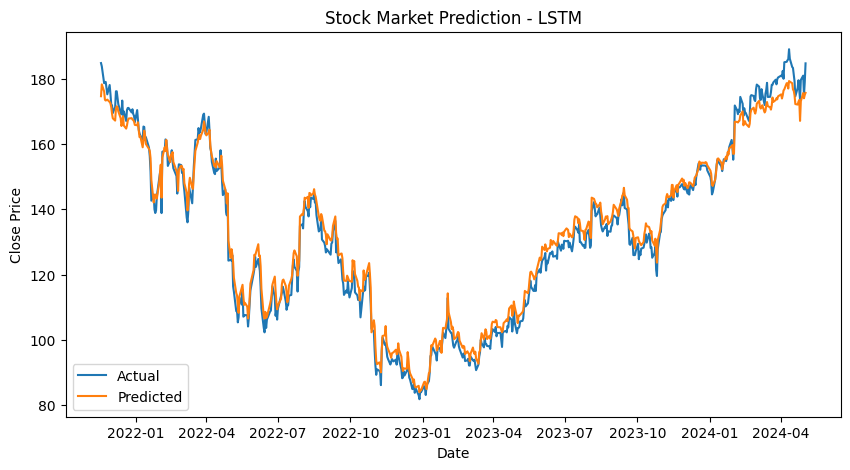

In [33]:
trained_lstm_model = train_lstm_model(X_train, X_test, y_train, y_test, df, train_index, test_index)

**def train_linear_regression_model(X_train, X_test, y_train, y_test, df, train_index, test_index):**
- This function trains a linear regression model for stock market prediction.

**global global_scaler:**
- This line accesses the global variable `global_scaler`, which is previously defined for scaling features.

**features = ['Open', 'High', 'Low', 'Volume']:**
- This line defines a list named `features` containing the column names 'Open', 'High', 'Low', and 'Volume', which are used for feature scaling.

**global_scaler.fit(df[features].values):**
- This line fits the global scaler (`global_scaler`) to the features in the DataFrame `df`.

**model1 = Sequential():**
- This line initializes a sequential model (`model1`) using Keras' Sequential API for building a neural network model.

**model1.add(Dense(64, input_dim=X_train.shape[2], activation='relu')):**
- This line adds a dense (fully connected) layer to the model with 64 units and ReLU activation function as the input layer.
- `input_dim=X_train.shape[2]` specifies the input dimension of the layer, which is the number of features.

**model1.add(Dense(32, activation='relu')):**
- This line adds a dense layer to the model with 32 units and ReLU activation function.

**model1.add(Dense(1)):**
- This line adds the output layer to the model with a single unit.

**model1.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error'):**
- This line compiles the model, configuring the optimizer (Adam optimizer with a learning rate of 0.001) and the loss function (mean squared error).

**X_train = X_train.reshape(X_train.shape[0], X_train.shape[2])** 
- Reshapes the training input data to be suitable for linear regression model.

**X_test = X_test.reshape(X_test.shape[0], X_test.shape[2])** 
- Reshapes the testing input data to be suitable for linear regression model.

**model1.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1):**
- This line trains the model on the training data (`X_train`, `y_train`) for 10 epochs with a batch size of 16.
- It also validates the model's performance on the testing data (`X_test`, `y_test`).

**predictions1 = model1.predict(X_test):**
- This line generates predictions for the testing data (`X_test`) using the trained model.

**plt.subplots(figsize=(10, 5)):** 
- This line initializes a Matplotlib figure and axis objects with a specified figure size.

**ax.plot(df.index[len(train_index): (len(train_index)+len(test_index))], y_test, label='Actual', linestyle='-'):**
- This line plots the actual values of the output variable (`y_test`) against the corresponding dates from the testing set.
- The `len(train_index)` and `len(test_index)` are used to slice the DataFrame index to match the testing data.

**ax.plot(df.index[len(train_index): (len(train_index)+len(test_index))], predictions1, label='Predicted', linestyle='-'):**
- This line plots the predicted values against the corresponding dates from the testing set.

**ax.set_title('Stock Market Prediction - Linear Regression'):**
- This line sets the title of the plot.

**ax.set_xlabel('Date'):**
- This line sets the label for the x-axis of the plot.

**ax.set_ylabel('Close Price'):**
- This line sets the label for the y-axis of the plot.

**ax.legend():**
- This line adds a legend to the plot.

**return model1:**
- This line returns the trained linear regression model.


In [34]:

def train_linear_regression_model(X_train, X_test, y_train, y_test, df, train_index, test_index):
    global global_scaler
    features = ['Open', 'High', 'Low', 'Volume']
    global_scaler.fit(df[features].values)

    # Build the linear regression model
    model1 = Sequential()
    model1.add(Dense(64, input_dim=X_train.shape[2], activation='relu'))
    model1.add(Dense(32, activation='relu'))
    model1.add(Dense(1))
    model1.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Reshape input data
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[2])

    # Train the model
    model1.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

    # Make predictions on the test set
    predictions1 = model1.predict(X_test)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df.index[len(train_index): (len(train_index)+len(test_index))], y_test, label='Actual', linestyle='-')
    ax.plot(df.index[len(train_index): (len(train_index)+len(test_index))], predictions1, label='Predicted', linestyle='-')
    ax.set_title('Stock Market Prediction - Linear Regression')
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.legend()
    return model1


**trained_linear_regression_model = train_linear_regression_model(X_train, X_test, y_train, y_test, df, train_index, test_index):**
- This line calls the function `train_linear_regression_model` to train a linear regression model with the provided data (`X_train`, `X_test`, `y_train`, `y_test`, `df`, `train_index`, `test_index`).
- The trained model is assigned to the variable `trained_linear_regression_model`.


Epoch 1/10


C:\Users\Tejas\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


386/386 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2015.9060 - val_loss: 302.8417
Epoch 2/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.0702 - val_loss: 3.4034
Epoch 3/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3493 - val_loss: 2.9605
Epoch 4/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2922 - val_loss: 3.0108
Epoch 5/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2898 - val_loss: 3.0823
Epoch 6/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2778 - val_loss: 2.9020
Epoch 7/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2923 - val_loss: 2.9113
Epoch 8/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2866 - val_loss: 2.9560
Epoch 9/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3255 - val_loss: 2.8965
Epoch 10/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2892 - val_loss: 2.9018
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


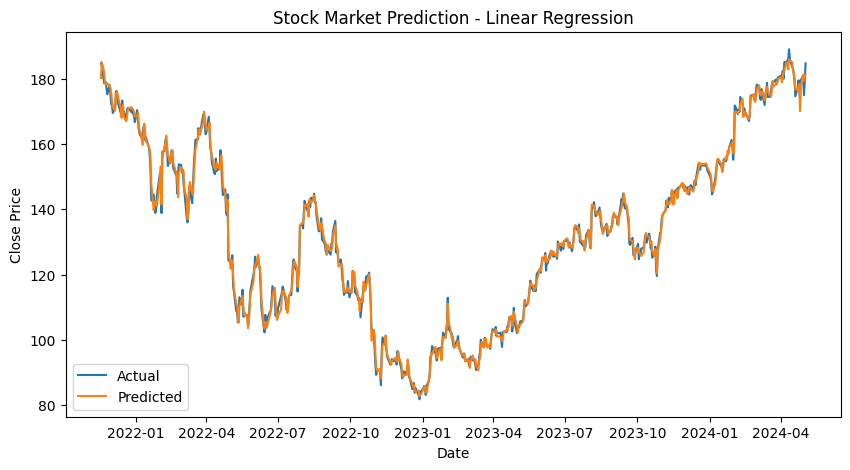

In [35]:
trained_linear_regression_model = train_linear_regression_model(X_train, X_test, y_train, y_test, df, train_index, test_index)

**global_scaler.fit(df[features].values):**
- This line fits the global scaler (`global_scaler`) to the specified features in the DataFrame `df`. 
- This operation calculates the minimum and maximum values of the features, which are then used for scaling the data.


In [37]:
global_scaler.fit(df[features].values)

MinMaxScaler()

**open_price = float(input("Enter Open Price: "))**
- This line prompts the user to input the open price of a stock and stores the value as a floating-point number in the variable `open_price`.

**high_price = float(input("Enter High Price: "))**
- This line prompts the user to input the high price of a stock and stores the value as a floating-point number in the variable `high_price`.

**low_price = float(input("Enter Low Price: "))**
- This line prompts the user to input the low price of a stock and stores the value as a floating-point number in the variable `low_price`.

**volume = float(input("Enter Volume: "))**
- This line prompts the user to input the volume of a stock and stores the value as a floating-point number in the variable `volume`.


In [38]:
open_price = float(input("Enter Open Price: "))
high_price = float(input("Enter High Price: "))
low_price = float(input("Enter Low Price: "))
volume = float(input("Enter Volume: "))


In [39]:
print(open_price) 
print(high_price )
print(low_price )
print(volume) 

180.0
185.0
179.0
54214500.0


**def predict_next_day_lstm(model, open_price, high_price, low_price, volume):**
- This function predicts the next day's stock price using an LSTM model.

**global global_scaler:**
- This line accesses the global variable `global_scaler`, which is previously defined for scaling features.

**input_data = global_scaler.transform([[open_price, high_price, low_price, volume]]):**
- This line transforms the input data (open price, high price, low price, and volume) using the global scaler (`global_scaler`).
- The input data is transformed to be on the same scale as the data used to train the LSTM model.

**input_data = input_data.reshape(1, 1, 4):**
- This line reshapes the input data into the appropriate shape for making predictions with the LSTM model.
- It reshapes the input data to have dimensions `(1, 1, 4)`, where 1 is the number of samples, 1 is the number of time steps, and 4 is the number of features.

**next_day_prediction = model.predict(input_data):**
- This line uses the trained LSTM model (`model`) to predict the next day's stock price based on the input data.

**return next_day_prediction:**
- This line returns the predicted next day's stock price.


In [40]:
def predict_next_day_lstm(model, open_price, high_price, low_price, volume):
    global global_scaler
    input_data = global_scaler.transform([[open_price, high_price, low_price, volume]])
    input_data = input_data.reshape(1, 1, 4)
    next_day_prediction = model.predict(input_data)
    return next_day_prediction


**def predict_next_day_regression(model1, open_price, high_price, low_price, volume):**
- This function predicts the next day's stock price using a linear regression model.

**global global_scaler:**
- This line accesses the global variable `global_scaler`, which is previously defined for scaling features.

**input_data = np.array([[open_price, high_price, low_price, volume]]):**
- This line creates a NumPy array containing the input data (open price, high price, low price, and volume).

**input_data = global_scaler.transform(input_data):**
- This line scales the input data using the global scaler (`global_scaler`).
- It transforms the input data to be on the same scale as the data used to train the linear regression model.

**input_data = input_data.reshape(1, 4):**
- This line reshapes the input data into the appropriate shape for making predictions with the linear regression model.
- It reshapes the input data to have dimensions `(1, 4)`, where 1 is the number of samples and 4 is the number of features.

**next_day_prediction1 = model1.predict(input_data):**
- This line uses the trained linear regression model (`model1`) to predict the next day's stock price based on the input data.

**return next_day_prediction1:**
- This line returns the predicted next day's stock price.


In [41]:
def predict_next_day_regression(model1, open_price, high_price, low_price, volume):
    global global_scaler
    input_data = np.array([[open_price, high_price, low_price, volume]])
    input_data = global_scaler.transform(input_data)
    input_data = input_data.reshape(1, 4)  # Reshape the input data to match the model's input shape
    next_day_prediction1 = model1.predict(input_data)
    return next_day_prediction1

In [42]:
next_day_price_lstm = predict_next_day_lstm(trained_lstm_model, open_price, high_price, low_price, volume)
next_day_price_regression = predict_next_day_regression(trained_linear_regression_model, open_price, high_price, low_price, volume)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [43]:
print(next_day_price_lstm)

[[175.24243]]


In [44]:
print(next_day_price_regression)

[[180.55296]]
